In [1]:
import arcpy
from arcpy import env
import os
from arcgis import GIS
from arcgis.features import GeoAccessor
import pandas as pd

arcpy.env.overwriteOutput = True
arcpy.env.parallelProcessingFactor = "90%"

# show all columns
pd.options.display.max_columns = None

# pd.DataFrame.spatial.from_featureclass(???)
# df.spatial.to_featureclass(location=???,sanitize_columns=False)

In [25]:
# if not os.path.exists('Outputs'):
#     os.makedirs('Outputs')
    
# outputs = ['.\\Outputs', "scratch.gdb", 'results.gdb']
# gdb = os.path.join(outputs[0], outputs[1])
# gdb2 = os.path.join(outputs[0], outputs[2])

# if not arcpy.Exists(gdb):
#     arcpy.CreateFileGDB_management(outputs[0], outputs[1])

# if not arcpy.Exists(gdb2):
#     arcpy.CreateFileGDB_management(outputs[0], outputs[2])

In [2]:
csv = pd.read_csv(r"E:\Tasks\Quick_Analyze_SQFT\parcels.csv")
parcels_sdf = pd.DataFrame.spatial.from_featureclass(r"E:\REMM\Base_Year_Data_2019\v1\remm_base_year_2019.gdb\parcels_2019")

In [3]:
parcels_sdf.columns

Index(['OBJECTID', 'parcel_id_REMM', 'CO_NAME', 'TAZID', 'COUNTY_ID',
       'PARCEL_ID', 'TOTAL_MKT_VALUE', 'land_value', 'residential_units',
       'building_sqft', 'FLOORS_CNT', 'year_built', 'EFFBUILT_YR', 'IS_OUG',
       'max_dua', 'max_far', 'max_height', 'type1', 'type2', 'type3', 'type4',
       'type5', 'type6', 'type7', 'type8', 'agriculture', 'basebldg',
       'NoBuild', 'redev_friction', 'building_type_id', 'x', 'y',
       'parcel_acres', 'Split', 'Split_Factor', 'parcel_id_REMM_old',
       'building_type', 'residential_price', 'non_residential_price',
       'non_residential_sqft', 'TAZID_832', 'TAZID_900', 'parcel_sqft',
       'SHAPE'],
      dtype='object')

In [4]:
csv.columns

Index(['parcel_id_REMM', 'CO_NAME', 'COUNTY_ID', 'PARCEL_ID',
       'TOTAL_MKT_VALUE', 'land_value', 'residential_units', 'building_sqft',
       'FLOORS_CNT', 'year_built', 'EFFBUILT_YR', 'IS_OUG', 'max_dua',
       'max_far', 'max_height', 'type1', 'type2', 'type3', 'type4', 'type5',
       'type6', 'type7', 'type8', 'agriculture', 'basebldg', 'NoBuild',
       'redev_friction', 'building_type_id', 'x', 'y', 'parcel_acres', 'Split',
       'Split_Factor', 'parcel_id_REMM_old', 'building_type',
       'residential_price', 'non_residential_price', 'non_residential_sqft',
       'TAZID_832', 'TAZID_900', 'Old_PID', 'parent_parcel', 'elevation',
       'fwy_exit', 'airport', 'rail_depot', 'stream', 'trail', 'university',
       'shape_area', 'volume_one_way', 'volume_two_way', 'airport_distance',
       'fwy_exit_dist', 'raildepot_dist', 'university_dist', 'trail_dist',
       'stream_dist', 'train_station', 'rail_stn_dist', 'bus_rte_dist',
       'bus_stop', 'bus_stop_dist', 'volume_tw

In [5]:
csv = csv[['parcel_id_REMM', 'shape_area']].copy()
parcels_sdf = parcels_sdf[['parcel_id_REMM', 'parcel_sqft']].copy()

In [6]:
csv['shape_area'] = csv['shape_area'].round(2)
parcels_sdf['parcel_sqft'] = parcels_sdf['parcel_sqft'].round(2)

In [7]:
merged = csv.merge(parcels_sdf,on='parcel_id_REMM', how='inner')

In [8]:
merged.shape

(712594, 3)

In [9]:
merged['diff'] = merged['shape_area'] - merged['parcel_sqft']

<AxesSubplot:>

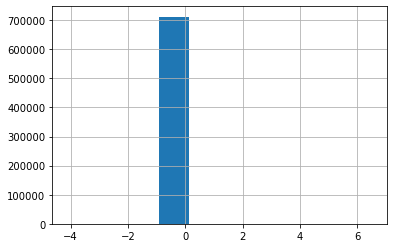

In [10]:
merged['diff'].hist()

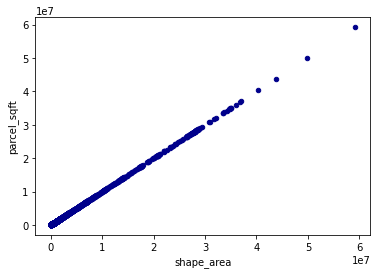

In [12]:
ax1 = merged.plot.scatter(x='shape_area',y='parcel_sqft', c='DarkBlue')

In [11]:
merged.to_csv('result.csv')

In [28]:
parcels_sdf = parcels_sdf[['parcel_id_REMM', 'parcel_acres']].copy()
parcels_sdf['AREA_SQFT'] = parcels_sdf['parcel_acres'] * 43560
del parcels_sdf['parcel_acres']

In [29]:
csv.shape

(712594, 68)

In [30]:
parcels_sdf.shape

(712594, 2)

In [31]:
new_csv = csv.merge(parcels_sdf, on='parcel_id_REMM', how='inner')
new_csv.shape

(712594, 69)

In [32]:
new_csv['shape_area'] = new_csv['AREA_SQFT']
del new_csv['AREA_SQFT']

In [33]:
new_csv.to_csv("parcels_fixed.csv", index=False)